【決定木】ジニ不純度と木の剪定(cost complexity pruning)を解説【機械学習入門29】

https://datawokagaku.com/decision_tree_classifier/



---



Pythonで決定木の分類器をpruningを使ってモデリングする
それでは，決定木の分類器バージョンをモデリングしてみましょう．

分類の決定木は， sklearn.tree.DecisionTreeClassifier クラスを使います．使い方は回帰の sklearn.tree.DecisionTreeRegressor と同じです．

---



In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset('titanic')
df = df.dropna() #欠損値を除外
X = df.loc[:,(df.columns!='survived')&(df.columns!='alive')]
X = pd.get_dummies(X,drop_first=True)
y = df['survived']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

今回はMinimal Cost-Complexity Pruningをやってみます．

.cost_complexity_pruning_path() メソッドを使うことで，各pruning時のeffective alphaとその木の不純度を取得できます（effective alphaが上がっていくにつれて，不純度は上がっていきます．）

---



In [3]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
eff_alphas, impurities = path.ccp_alphas, path.impurities
print(eff_alphas)
print(impurities)

[0.         0.00656168 0.00656168 0.00699913 0.00726832 0.0077282
 0.00787402 0.01049869 0.0111986  0.0118874  0.01526093 0.01880243
 0.02677358 0.12717222]
[0.         0.01312336 0.02624672 0.04024497 0.05478161 0.07023802
 0.07811203 0.09910941 0.11030801 0.14597022 0.2375358  0.2939431
 0.32071667 0.4478889 ]


それでは，これらのeffective alphaに対してcost complexity pruningを使って実際に木を作ってみます．
これには，モデルのインスタンス生成時に ccp_alpha 引数を指定します．


---



In [4]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)

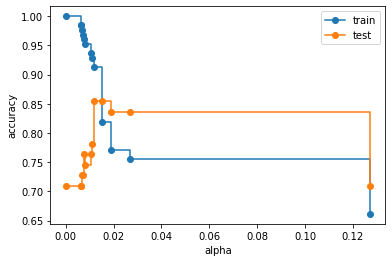

In [5]:
import matplotlib.pyplot as plt
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(eff_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(eff_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()